In [67]:
# Loading packages 
import pandas as pd
import os
os.chdir("D:/data")

In [68]:
# Loading the Data
df=pd.read_csv("datasets_14872_228180_Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [69]:
# Checking the Null or Missing values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance               0
dtype: int64

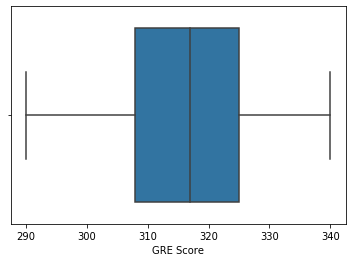

In [70]:
#checking Outliers for GRE and Chance of Admit
import seaborn as sns 
sns.boxplot(df["GRE Score"])

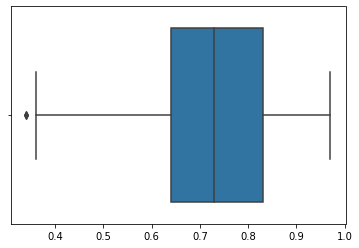

In [71]:
sns.boxplot(df.iloc[:,[8]])

#### There is no major outliers in GRE and Chance of Admit

In [72]:
# Extracting features for importance and compare with other features 
X=df.iloc[:,[1,2,3,4,5,6,7]]
y=df.iloc[:,[8]]
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [73]:
y.head()

,Chance
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


# Feature Importances (using ensemble technique)

In [74]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

C:\Users\Abhisek Datta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Abhisek Datta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [75]:
model.feature_importances_

array([0.17845637, 0.13911163, 0.09193263, 0.11480475, 0.09398209,
       0.34381646, 0.03789607])

In [76]:
#Creating a seperate data frame to capture the features as well as importances
df.features=pd.DataFrame(X.columns, columns=["Features"])
df.importance=pd.DataFrame(model.feature_importances_, columns=["Importances"])
after_concat=pd.concat([df.features,df.importance],axis=1)
after_concat.nlargest(7,"Importances")

C:\Users\Abhisek Datta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\Abhisek Datta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,Features,Importances
5,CGPA,0.343816
0,GRE Score,0.178456
1,TOEFL Score,0.139112
3,SOP,0.114805
4,LOR,0.093982
2,University Rating,0.091933
6,Research,0.037896


#### Here the GRE Score importance is 0.178456with the help of ExtraTreeRegressor and in the second place 

In [99]:
# For train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [100]:
# Applying Linera Regression 
from sklearn.linear_model import LinearRegression
lm=LinearRegression(normalize=True)

In [101]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [104]:
y_predic=lm.predict(X_test)

In [105]:
 # R2 for train
lm.score(X_train,y_train)

0.8221063439698572

In [106]:
 # R2 for test
lm.score(X_test,y_test)

0.745662488302934

In [107]:
lm.coef_

array([[ 0.00186803,  0.0022731 ,  0.00270635, -0.0030745 ,  0.02071688,
         0.13025483,  0.02269622]])

In [108]:
# Calculating Mean Squrae Error
from sklearn.metrics import mean_squared_error

In [109]:
mean_squared_error(y_test, y_predic)

0.004377217459382591

#### Root Mean Square is 0.00437